<a href="https://colab.research.google.com/github/gendeb/cloud-computing-specialization/blob/master/ML_traffic_anomalies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analyze with Pandas a logcon from pcap file and zeek##


In [ ]:
!pip install pandas

In [ ]:
import os
import pandas as pd


## Import ZAT library that can read zeek  logs ##

In [ ]:
# Install ZAT in this colab
!pip install zat
from zat.log_to_dataframe import LogToDataFrame

# Import Numpy

In [ ]:
# Install numpy
import numpy as np

## What is matplotlib?¶
Matplotlib is a Python tool for making charts and graphs. It helps turn numbers into pictures, making data easier to understand by creating visual representations.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Install sklearn
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
# Install UMAP libraries in this colab
!pip install umap-learn
import umap

In [ ]:
#Import ipaddress
import ipaddress

In [ ]:
# Change to your desired directory
%cd //Users/alexhenryhayes/Documents/LABSCloud/zeek-docker/zeek-logs

# Verify the current working directory
%pwd

## In summary
- Pandas is for data manipulation
- Scikit-learn is for machine learning
- UMAP is for dimensionality reduction
- TensorFlow is a comprehensive machine learning library
- Keras is a high-level neural networks API
- Matplotlib is for data visualization.

# Importing data and initial cleaning

## What is pandas dataframe?
A 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects.


## Load the conn.log file #

In [ ]:

df = pd.read_csv('conn.log', sep='\t', comment='#')

### Instantiate the zat class and how many we have

In [ ]:
# Instantiate the zat class
logtodf = LogToDataFrame()

# Read the conn.log file and convert it to a pandas dataframe
conn_df = logtodf.create_dataframe(log_filename='conn.log')
#Check how many flows we have
len(conn_df)

340

In [ ]:
conn_df

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents
ts,,,,,,,,,,,,,,,,,,,,
2020-05-17 18:10:00.746551991,CcjPjp2LH7HQpKWj12,172.31.0.2,45922,172.217.13.74,443,tcp,NaN,0 days 00:00:02.849965,24,0,SH,T,F,0,FT,4,304,0,0,NaN
2020-05-17 18:10:02.252079010,C2ATLH3tSOLOgz0Kki,172.31.0.2,59297,104.112.21.176,443,tcp,ssl,0 days 00:00:00.587438,581,4563,SF,T,F,0,ShADadFRf,14,1257,11,5151,NaN
2020-05-17 18:10:04.539150953,CBJpmz3cIqfieA9bUk,192.168.10.134,46593,172.217.12.234,443,tcp,NaN,0 days 00:00:00.002225,0,0,SHR,T,F,0,^fA,1,64,2,104,NaN
2020-05-17 18:10:02.080459118,Cjy1414ilijlws5hyi,192.168.11.47,5353,224.0.0.251,5353,udp,dns,NaT,<NA>,<NA>,S0,T,F,0,D,1,122,0,0,NaN
2020-05-17 18:10:02.093030930,CF9SQ9buFFcKrOZhb,172.31.0.2,15049,192.168.0.1,53,udp,dns,0 days 00:00:00.153908,38,133,SF,T,T,0,Dd,1,66,1,161,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-17 18:10:05.547771931,CWYCQM1piAFiGFOox1,172.31.0.2,49010,104.70.76.238,443,tcp,ssl,0 days 00:00:00.642265,581,3964,S1,T,F,0,ShADad,8,1005,6,4292,NaN
2020-05-17 18:10:10.982165098,Cvb60V1xOhxun20A96,192.168.0.225,17500,192.168.255.255,17500,udp,NaN,0 days 00:01:30.017845,616,0,S0,T,T,0,D,4,728,0,0,NaN
2020-05-17 18:10:05.459554911,CuMan316NsRTo4lo1b,192.168.19.183,17500,192.168.255.255,17500,udp,NaN,0 days 00:01:32.160995,2488,0,S0,T,T,0,D,16,2936,0,0,NaN


In [ ]:
# View the column names of the dataframe
conn_df.dtypes

uid                        object
id.orig_h                category
id.orig_p                  UInt16
id.resp_h                category
id.resp_p                  UInt16
proto                    category
service                  category
duration          timedelta64[ns]
orig_bytes                 UInt64
resp_bytes                 UInt64
conn_state               category
local_orig               category
local_resp               category
missed_bytes               UInt64
history                  category
orig_pkts                  UInt64
orig_ip_bytes              UInt64
resp_pkts                  UInt64
resp_ip_bytes              UInt64
tunnel_parents           category
dtype: object

In [ ]:
# Describe all the features
conn_df.describe(include='all')

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents
count,340,340,340.0,340,340.0,340,263,227,227.0,227.0,340,340,340,340.0,338,340.0,340.0,340.0,340.0,0
unique,340,39,<NA>,41,<NA>,3,3,NaN,<NA>,<NA>,9,1,2,<NA>,25,<NA>,<NA>,<NA>,<NA>,0
top,CcjPjp2LH7HQpKWj12,192.168.10.134,<NA>,224.0.0.251,<NA>,udp,dns,NaN,<NA>,<NA>,S0,T,F,<NA>,D,<NA>,<NA>,<NA>,<NA>,NaN
freq,1,104,<NA>,121,<NA>,237,201,NaN,<NA>,<NA>,180,340,228,<NA>,180,<NA>,<NA>,<NA>,<NA>,NaN
mean,NaN,NaN,28429.897059,NaN,3868.523529,NaN,NaN,0 days 00:00:09.085445330,2671.273128,17685.612335,NaN,NaN,NaN,0.0,NaN,7.817647,2178.182353,11.720588,12429.105882,NaN
std,NaN,NaN,22570.029089,NaN,7010.426373,NaN,NaN,0 days 00:00:25.833337470,17833.783755,166961.376194,NaN,NaN,NaN,0.0,NaN,24.053572,15266.638531,100.072753,141789.016757,NaN
min,NaN,NaN,3.0,NaN,3.0,NaN,NaN,0 days 00:00:00.000064,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN
25%,NaN,NaN,5353.0,NaN,443.0,NaN,NaN,0 days 00:00:00.002758500,38.0,0.0,NaN,NaN,NaN,0.0,NaN,1.0,72.75,0.0,0.0,NaN
50%,NaN,NaN,30847.5,NaN,1900.0,NaN,NaN,0 days 00:00:00.326810,250.0,55.0,NaN,NaN,NaN,0.0,NaN,1.0,125.0,0.0,0.0,NaN
75%,NaN,NaN,50709.75,NaN,5353.0,NaN,NaN,0 days 00:00:02.860826500,616.0,1312.5,NaN,NaN,NaN,0.0,NaN,4.0,728.0,1.0,142.25,NaN


In [ ]:
# Get the unique values of the label column
# Same as conndf["label"].unique()
conn_df.proto.unique()

['tcp', 'udp', 'icmp']
Categories (3, object): ['icmp', 'tcp', 'udp']

In [ ]:
# Get the unique values of the conn_state column
conn_df.conn_state.unique()

['SH', 'SF', 'SHR', 'S0', 'RSTRH', 'OTH', 'RSTR', 'S1', 'S3']
Categories (9, object): ['OTH', 'RSTR', 'RSTRH', 'S0', ..., 'S3', 'SF', 'SH', 'SHR']

In [ ]:
# Drop the column 'tunnel_parents' and 'uid' that we don't need them
conn_df = conn_df.drop(columns=['tunnel_parents', 'uid'])

In [ ]:
# Show the rows from 100:110
conn_df[100:110]

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
ts,,,,,,,,,,,,,,,,,,
2020-05-17 18:10:17.440895081,192.168.10.130,50696,224.0.0.252,5355,udp,dns,0 days 00:00:00.306885,44,0,S0,T,F,0,D,2,100,0,0
2020-05-17 18:10:17.441478968,192.168.10.130,61489,224.0.0.252,5355,udp,dns,0 days 00:00:00.306178,44,0,S0,T,F,0,D,2,100,0,0
2020-05-17 18:10:08.225001097,192.168.10.130,5353,224.0.0.251,5353,udp,dns,0 days 00:00:10.128841,288,0,S0,T,F,0,D,9,540,0,0
2020-05-17 18:10:08.224845886,192.168.10.130,137,192.168.255.255,137,udp,dns,0 days 00:00:10.751809,600,0,S0,T,T,0,D,12,936,0,0
2020-05-17 18:10:10.054254055,192.168.10.134,41100,192.168.0.1,53,udp,dns,0 days 00:00:03.964043,84,154,SF,T,T,0,Dd,2,140,2,210
2020-05-17 18:10:22.048284054,192.168.11.47,5353,224.0.0.251,5353,udp,dns,NaT,<NA>,<NA>,S0,T,F,0,D,1,122,0,0
2020-05-17 18:10:22.356118917,192.168.10.164,5353,224.0.0.251,5353,udp,dns,NaT,<NA>,<NA>,S0,T,F,0,D,1,122,0,0
2020-05-17 18:10:12.516712904,192.168.10.155,5353,224.0.0.251,5353,udp,dns,0 days 00:00:01.844786,330,0,S0,T,F,0,D,3,414,0,0
2020-05-17 18:10:23.584657907,192.168.10.132,5353,224.0.0.251,5353,udp,dns,NaT,<NA>,<NA>,S0,T,F,0,D,1,122,0,0


## Exploratory data analysis
View the dataset and try to understand it.

## Plot the amount of each proto

/var/folders/ct/ghxtkyqs2txd2qcls51zgbgm0000gn/T/ipykernel_41611/1849114858.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conn_df.groupby(conn_df.proto)["proto"].count().plot.barh(figsize=(12, 8))


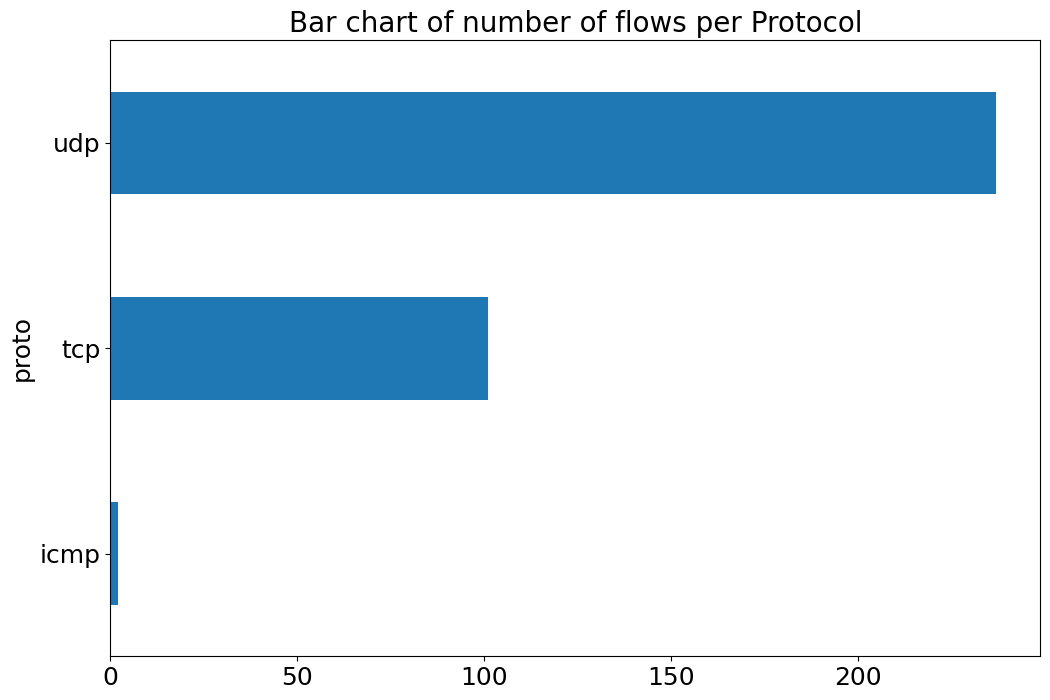

In [ ]:
# matplotlib configuration parameters
# plt is matplotlib
plt.rcParams.update({'font.size': 18})

# Group the flows by label and count the entries in each group.
# Then plot the bar chart horizontally
conn_df.groupby(conn_df.proto)["proto"].count().plot.barh(figsize=(12, 8))
plt.title("Bar chart of number of flows per Protocol", fontsize=20);

## Plot the amount of each detailed label

/var/folders/ct/ghxtkyqs2txd2qcls51zgbgm0000gn/T/ipykernel_41611/4208612772.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conn_df.groupby(conn_df.conn_state)["conn_state"].count().plot.barh(figsize=(12, 8), logx=True)


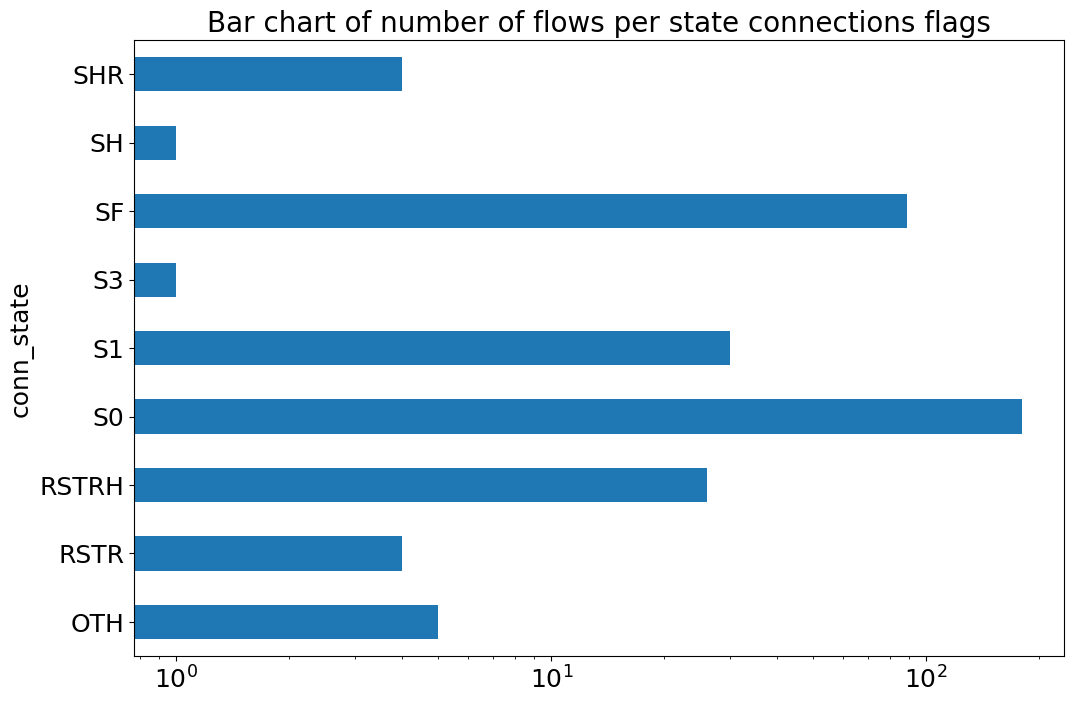

In [ ]:
# Group the flows by detailed_label and count the entries in each group.
# Then plot the bar chart horizontally in logarithmic scale!
conn_df.groupby(conn_df.conn_state)["conn_state"].count().plot.barh(figsize=(12, 8), logx=True)
plt.title("Bar chart of number of flows per state connections flags", fontsize=20);

In [ ]:
# And in numbers?
conn_df.groupby(conn_df.conn_state)["conn_state"].count()

/var/folders/ct/ghxtkyqs2txd2qcls51zgbgm0000gn/T/ipykernel_41611/455499336.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conn_df.groupby(conn_df.conn_state)["conn_state"].count()


conn_state
OTH        5
RSTR       4
RSTRH     26
S0       180
S1        30
S3         1
SF        89
SH         1
SHR        4
Name: conn_state, dtype: int64

## Plot the sent bytes and receive bytes. Is there any correlation?

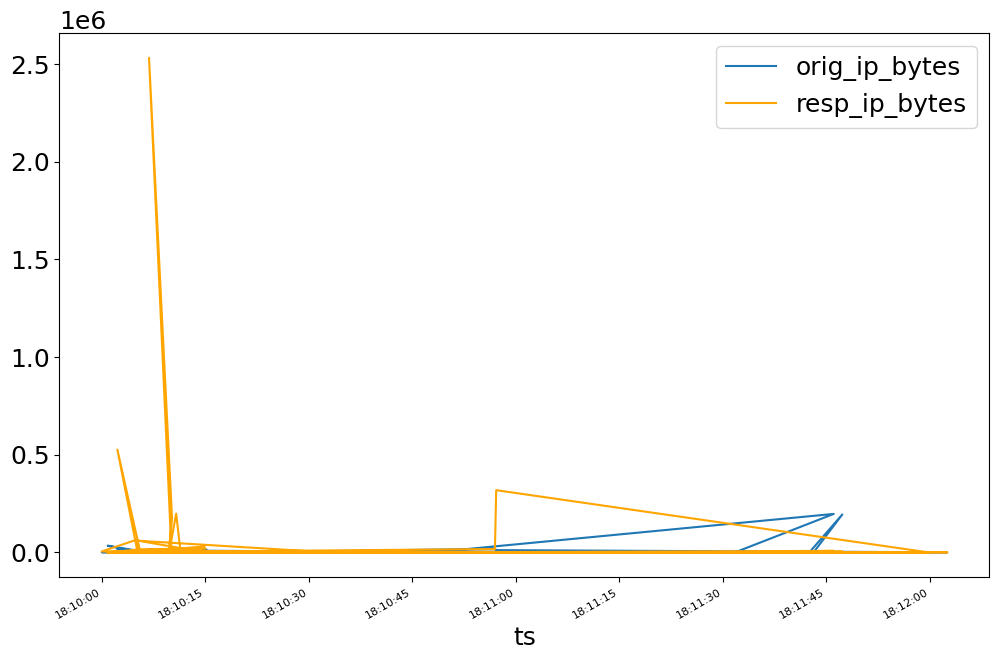

In [ ]:
axis = conn_df.orig_ip_bytes.dropna().plot(figsize=(12, 8))
axis.grid(axis='y')
axis = conn_df.resp_ip_bytes.dropna().plot(figsize=(12, 8), ax=axis, color='orange')
axis.tick_params(axis='x', labelsize=8)  # Set labelsize to your desired value
axis.legend() #Adding the legend

## Change column types to match what they really have

In [ ]:
# Since the timestamp is being used as index, lets create a real numerical index
conn_df = conn_df.reset_index()

In [ ]:
conn_df

,ts,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,2020-05-17 18:10:00.746551991,172.31.0.2,45922,172.217.13.74,443,tcp,NaN,0 days 00:00:02.849965,24,0,SH,T,F,0,FT,4,304,0,0
1,2020-05-17 18:10:02.252079010,172.31.0.2,59297,104.112.21.176,443,tcp,ssl,0 days 00:00:00.587438,581,4563,SF,T,F,0,ShADadFRf,14,1257,11,5151
2,2020-05-17 18:10:04.539150953,192.168.10.134,46593,172.217.12.234,443,tcp,NaN,0 days 00:00:00.002225,0,0,SHR,T,F,0,^fA,1,64,2,104
3,2020-05-17 18:10:02.080459118,192.168.11.47,5353,224.0.0.251,5353,udp,dns,NaT,<NA>,<NA>,S0,T,F,0,D,1,122,0,0
4,2020-05-17 18:10:02.093030930,172.31.0.2,15049,192.168.0.1,53,udp,dns,0 days 00:00:00.153908,38,133,SF,T,T,0,Dd,1,66,1,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,2020-05-17 18:10:05.547771931,172.31.0.2,49010,104.70.76.238,443,tcp,ssl,0 days 00:00:00.642265,581,3964,S1,T,F,0,ShADad,8,1005,6,4292
336,2020-05-17 18:10:10.982165098,192.168.0.225,17500,192.168.255.255,17500,udp,NaN,0 days 00:01:30.017845,616,0,S0,T,T,0,D,4,728,0,0
337,2020-05-17 18:10:05.459554911,192.168.19.183,17500,192.168.255.255,17500,udp,NaN,0 days 00:01:32.160995,2488,0,S0,T,T,0,D,16,2936,0,0
338,2020-05-17 18:10:06.381318092,192.168.0.6,39292,192.168.255.255,32414,udp,NaN,0 days 00:01:55.201092,399,0,S0,T,T,0,D,19,931,0,0


## Let's convert some columns that used to be strings into a real object. So the libraries know how to use them.¶
The 'ts' timestamp into a dateatime.

The  'proto', 'conn_state', 'service' into a categorical field.

In [ ]:
print(conn_df['ts'].dtype)

datetime64[ns]


In [ ]:
# Convert 'ts' column from datetime to Unix timestamp in seconds
conn_df['ts'] = conn_df['ts'].astype('float64')
conn_df['proto'] = conn_df['proto'].astype('category')
conn_df['conn_state'] = conn_df['conn_state'].astype('category')
conn_df['service'] = conn_df['service'].astype('category')

In [ ]:
# The IP address is hard to manipulate as a string. Convert to integer
conn_df['id.orig_h'] = conn_df['id.orig_h'].apply(lambda x: int(ipaddress.ip_address(x)))

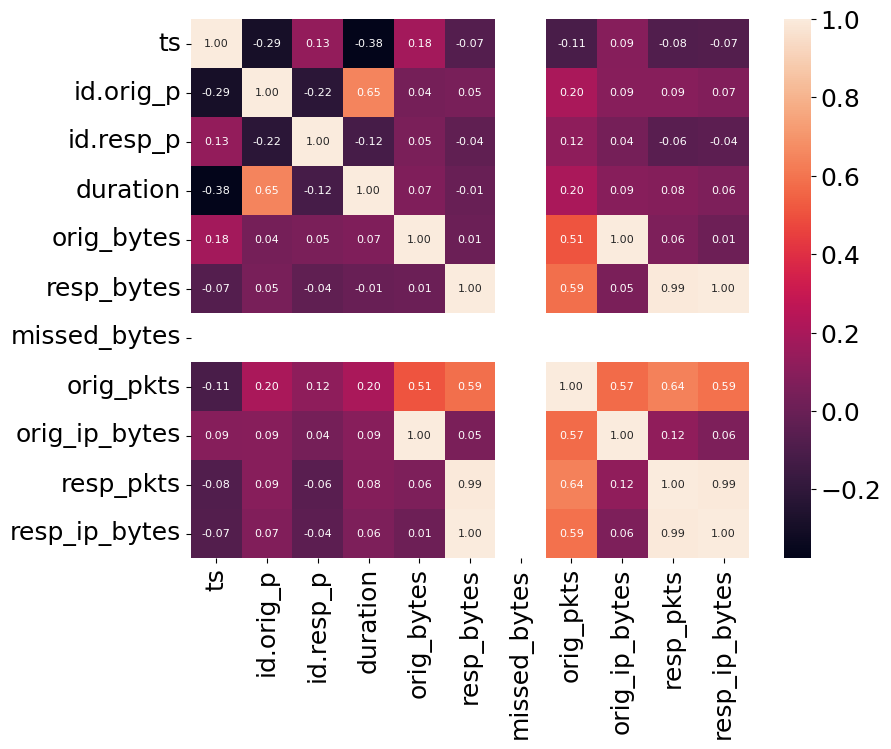

In [ ]:
# seaborn is a visualization library that has many good types of plots and even interactivity.
import seaborn as sns
plt.figure(figsize=(9, 7))  # Increase figure size for better readability

numeric_df = conn_df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f" , annot_kws={"size": 8});

### Correlation measures the strength and direction of a linear relationship between two variables, where lighter colors in the heatmap represent strong positive correlations, darker colors represent weak or negative correlations, and a value of 1 indicates perfect alignment between two variables.

orig_bytes and orig_ip_bytes: These variables show a relatively strong positive correlation (lighter shade), indicating that higher values in orig_bytes are likely to be associated with higher orig_ip_bytes.

service and local_orig: There is a moderate to strong negative correlation (purple hue), suggesting an inverse relationship between these two variables.

id.orig_h and id.resp_h: The correlation between these seems somewhat positive (intermediate light color), which might suggest that these variables have some level of linear association.

---------

# Data pre-processing

At the beginning of your analysis is a good idea to start with a small amount of data and not the whole dataset. Because is faster to try methods, and because of memory issues of data not fitting into RAM.

## Columns
* Some columns may be mostly empty
* Some columns may be correlated
* Expert knowledge may indicate that they are not that useful

## Rows
* Check which rows are probably not interesting, like doing a grep.

- Deal with missing values.
- Other useful transformations.
- Most time consuming task.
- Many decisions and assumptions that may affect the modelling.

Becareful, Colab has a RAM limit so you need to fit a small amount of data in RAM. Usually a dataset of 10k rows will start to have issues in some models like clustering. But others may work.

You can do `conn_df2  = conn_df.sample(frac=.3)`

## First, lets change the flows without label to have '-'

In [ ]:
conn_df['conn_state'] = conn_df['conn_state'].cat.add_categories(['-'])
conn_df.conn_state.fillna('-', inplace=True)

/var/folders/ct/ghxtkyqs2txd2qcls51zgbgm0000gn/T/ipykernel_41611/935970922.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  conn_df.conn_state.fillna('-', inplace=True)


### Select which columns to work
For the clustering method that we are going to be using later, we need numbers and we can not work with strings or categorical variables. So be sure we only select numerical columns.

In [ ]:
# use describe() to see the numerical columns
conn_df.describe()

,ts,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,3.400000e+02,340.0,340.0,227,227.0,227.0,340.0,340.0,340.0,340.0,340.0
mean,1.589739e+09,28429.897059,3868.523529,0 days 00:00:09.085445330,2671.273128,17685.612335,0.0,7.817647,2178.182353,11.720588,12429.105882
std,3.667688e+01,22570.029089,7010.426373,0 days 00:00:25.833337470,17833.783755,166961.376194,0.0,24.053572,15266.638531,100.072753,141789.016757
min,1.589739e+09,3.0,3.0,0 days 00:00:00.000064,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.589739e+09,5353.0,443.0,0 days 00:00:00.002758500,38.0,0.0,0.0,1.0,72.75,0.0,0.0
50%,1.589739e+09,30847.5,1900.0,0 days 00:00:00.326810,250.0,55.0,0.0,1.0,125.0,0.0,0.0
75%,1.589739e+09,50709.75,5353.0,0 days 00:00:02.860826500,616.0,1312.5,0.0,4.0,728.0,1.0,142.25
max,1.589739e+09,65504.0,56138.0,0 days 00:02:01.958706,189250.0,2439411.0,0.0,222.0,196694.0,1773.0,2531615.0


In [ ]:
# We are going to create a new dataframe num_df, only with the numerical features and the other features we want

# Only select the numerical columns using select_dtypes
num_df = conn_df.select_dtypes(include=np.number)
# Then add the state as a column
num_df['conn_state'] = conn_df[['conn_state']]
# Then add the protocol
num_df['proto'] = conn_df[['proto']]
# Then add the src IP
num_df['id.orig_h'] = conn_df[['id.orig_h']]

In [ ]:
num_df

,ts,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,conn_state,proto,id.orig_h
0,1.589739e+09,45922,443,0 days 00:00:02.849965,24,0,0,4,304,0,0,SH,tcp,2887712770
1,1.589739e+09,59297,443,0 days 00:00:00.587438,581,4563,0,14,1257,11,5151,SF,tcp,2887712770
2,1.589739e+09,46593,443,0 days 00:00:00.002225,0,0,0,1,64,2,104,SHR,tcp,3232238214
3,1.589739e+09,5353,5353,NaT,<NA>,<NA>,0,1,122,0,0,S0,udp,3232238383
4,1.589739e+09,15049,53,0 days 00:00:00.153908,38,133,0,1,66,1,161,SF,udp,2887712770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,1.589739e+09,49010,443,0 days 00:00:00.642265,581,3964,0,8,1005,6,4292,S1,tcp,2887712770
336,1.589739e+09,17500,17500,0 days 00:01:30.017845,616,0,0,4,728,0,0,S0,udp,3232235745
337,1.589739e+09,17500,17500,0 days 00:01:32.160995,2488,0,0,16,2936,0,0,S0,udp,3232240567
338,1.589739e+09,39292,32414,0 days 00:01:55.201092,399,0,0,19,931,0,0,S0,udp,3232235526


### Discard emtpy columns

In [ ]:
# Discard these columns that have no value
num_df = num_df.drop(columns=['missed_bytes'], axis='columns')

In [ ]:
num_df.describe(include='all')

,ts,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,conn_state,proto,id.orig_h
count,3.400000e+02,340.0,340.0,227,227.0,227.0,340.0,340.0,340.0,340.0,340,340,3.400000e+02
unique,NaN,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,9,3,3.900000e+01
top,NaN,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,S0,udp,3.232238e+09
freq,NaN,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,180,237,1.040000e+02
mean,1.589739e+09,28429.897059,3868.523529,0 days 00:00:09.085445330,2671.273128,17685.612335,7.817647,2178.182353,11.720588,12429.105882,NaN,NaN,NaN
std,3.667688e+01,22570.029089,7010.426373,0 days 00:00:25.833337470,17833.783755,166961.376194,24.053572,15266.638531,100.072753,141789.016757,NaN,NaN,NaN
min,1.589739e+09,3.0,3.0,0 days 00:00:00.000064,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
25%,1.589739e+09,5353.0,443.0,0 days 00:00:00.002758500,38.0,0.0,1.0,72.75,0.0,0.0,NaN,NaN,NaN
50%,1.589739e+09,30847.5,1900.0,0 days 00:00:00.326810,250.0,55.0,1.0,125.0,0.0,0.0,NaN,NaN,NaN
75%,1.589739e+09,50709.75,5353.0,0 days 00:00:02.860826500,616.0,1312.5,4.0,728.0,1.0,142.25,NaN,NaN,NaN


### Some columns may have NaN (Not a Number), so if you want to use them, you need to fix them

In [ ]:
# How to know if some column has NaN?
num_df.isna().any()

ts               False
id.orig_p        False
id.resp_p        False
duration         False
orig_bytes       False
resp_bytes       False
orig_pkts        False
orig_ip_bytes    False
resp_pkts        False
resp_ip_bytes    False
conn_state        True
proto            False
id.orig_h        False
dtype: bool

### Fix nans
it doesn't have data

# Which flows do not have origin bytes?
###num_df[num_df['duration'].isna()]

Looks like these packets with state S0, connection attempts, did not send or receive data. So what should be done?

It is a good feature when we have it, but also we need all the flows to have some integer.

In the case of source bytes and destination bytes, the best is probably to put 0, since technically they sent 0 bytes.

In [ ]:
num_df.orig_bytes.fillna(0.0, inplace=True)
num_df.resp_bytes.fillna(0.0, inplace=True)

/var/folders/ct/ghxtkyqs2txd2qcls51zgbgm0000gn/T/ipykernel_41611/647210493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  num_df.orig_bytes.fillna(0.0, inplace=True)
/var/folders/ct/ghxtkyqs2txd2qcls51zgbgm0000gn/T/ipykernel_41611/647210493.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [ ]:
# Check it worked
num_df[num_df['duration'].isna()]

,ts,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,conn_state,proto,id.orig_h


### One-hot or dummy encoding

Most ML algorithms require numerical/continuous data to work.

- We need to transform our categorical variables into numbers.
- But not any number, the number has to make sense.
- One-hot encoding is a technique used to represent categorical variables as binary vectors. In this encoding, each unique category is represented by a binary value (0 or 1) in a separate column.
- So you end up with one new column per category
- Order of the categories **must not** important.
- Can be problematic if we have too many categories.
- Pandas `get_dummies()`, scikit-learn: `OneHotEncoder()`.


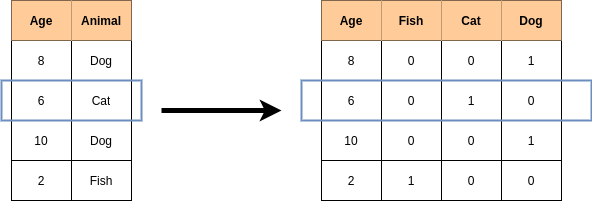



In [ ]:
# Lets see the unique values of the proto variable that is object (almost like categorical)
num_df.proto.unique()

['tcp', 'udp', 'icmp']
Categories (3, object): ['icmp', 'tcp', 'udp']

In [ ]:
# Get the unique values of the conn_state variable
num_df.conn_state.unique()

[NaN, 'SF', 'S0', 'OTH', 'RSTR']
Categories (7, object): ['S0', 'OTH', 'SF', 'REJ', 'RSTOS0', 'RSTR', 'S2']

## Cleaning data

In [ ]:
# cleaning data
print(num_df['conn_state'].isnull().sum())  # Count of missing values

62


In [ ]:
num_df['conn_state'].fillna('S0', inplace=True)  # Replace NaN with a placeholder

## Searching a right categories by command
desired_categories = ['S0', 'OTH', 'SF', 'REJ', 'RSTOS0', 'RSTR', 'S2']
num_df['conn_state'] = num_df['conn_state'].cat.remove_unused_categories()
num_df['conn_state'] = num_df['conn_state'].cat.set_categories(desired_categories)

In [ ]:
num_df2 = pd.get_dummies(num_df, columns=['conn_state', 'proto'], drop_first=True)

In [ ]:
num_df2.drop(columns=['duration'], inplace=True)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
print(num_df2.head())

             ts  id.orig_p  id.resp_p  orig_bytes  resp_bytes  orig_pkts  \
0  1.589739e+09      45922        443          24           0          4   
1  1.589739e+09      59297        443         581        4563         14   
2  1.589739e+09      46593        443           0           0          1   
3  1.589739e+09       5353       5353           0           0          1   
4  1.589739e+09      15049         53          38         133          1   

   orig_ip_bytes  resp_pkts  resp_ip_bytes   id.orig_h  conn_state_OTH  \
0            304          0              0  2887712770           False   
1           1257         11           5151  2887712770           False   
2             64          2            104  3232238214           False   
3            122          0              0  3232238383           False   
4             66          1            161  2887712770           False   

   conn_state_SF  conn_state_REJ  conn_state_RSTOS0  conn_state_RSTR  \
0          False          

In [ ]:
num_df2 = pd.get_dummies(num_df, columns=['conn_state', 'proto'], drop_first=True)
num_df2.drop(columns=['duration'], inplace=True)
pd.set_option('display.max_columns', None)
num_df2.head()

,ts,id.orig_p,id.resp_p,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,id.orig_h,conn_state_OTH,conn_state_SF,conn_state_REJ,conn_state_RSTOS0,conn_state_RSTR,conn_state_S2,proto_tcp,proto_udp
0,1.589739e+09,45922,443,24,0,4,304,0,0,2887712770,False,False,False,False,False,False,True,False
1,1.589739e+09,59297,443,581,4563,14,1257,11,5151,2887712770,False,True,False,False,False,False,True,False
2,1.589739e+09,46593,443,0,0,1,64,2,104,3232238214,False,False,False,False,False,False,True,False
3,1.589739e+09,5353,5353,0,0,1,122,0,0,3232238383,False,False,False,False,False,False,False,True
4,1.589739e+09,15049,53,38,133,1,66,1,161,2887712770,False,True,False,False,False,False,False,True


## older command with mapping and transposition in  the wrong way

In [ ]:
# Replace the categorical variables with multiple columns (one per category)
#num_df2 = pd.get_dummies(num_df)
#pd.set_option('display.max_columns', None)
#num_df2.head()

# Let's train the cluster algorithm to create a cluster model

In [ ]:
num_df2.columns

Index(['ts', 'id.orig_p', 'id.resp_p', 'orig_bytes', 'resp_bytes', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'id.orig_h',
       'conn_state_OTH', 'conn_state_SF', 'conn_state_REJ',
       'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_S2', 'proto_tcp',
       'proto_udp'],
      dtype='object')

The first step in modelling is storing the data that will be used in an array instead of a pandas dataframe. Arrays are more generic and simple (no column names, etc.) So many algorithms only work with arrays. (Some others work in dataframe

In [ ]:
# Now that all columns have numerical values let's save them to a numpy array.
# Traditional name for this variable is X since it is going to be the main data for the algorithm
X = num_df2.values

# Get the dimension of the numpy array (rows, columns)
X.shape

(340, 18)

In [ ]:
X

array([[1589739000.0, 45922, 443, ..., False, True, False],
       [1589739002.0, 59297, 443, ..., False, True, False],
       [1589739004.0, 46593, 443, ..., False, True, False],
       ...,
       [1589739005.0, 17500, 17500, ..., False, False, True],
       [1589739006.0, 39292, 32414, ..., False, False, True],
       [1589739010.0, 17500, 17500, ..., False, False, True]],
      dtype=object)

## Feature scaling
  - Why is this step needed?
  - What are the options

## Why is Feature Scaling Needed?

Feature scaling means being sure all the 'fields' (also called features) have the same scale. For example, from 0 to 1, or from -10 to 10, etc.

Feature scaling is crucial in machine learning because it ensures that all features contribute equally to the computations performed by the learning algorithm. Many machine learning algorithms are sensitive to the scale of input features, and having features with different scales can lead to issues. Here are a couple of reasons why feature scaling is important:

- Algorithm Sensitivity:

For example, distance-based algorithms like k-nearest neighbors (KNN) and gradient descent optimization algorithms (used in linear regression, logistic regression, neural networks, etc.) can be affected by different feature scales.

- Convergence Speed:

Algorithms that involve optimization (e.g., gradient descent) often converge faster when features are on a similar scale. This is particularly important for large datasets and deep learning models.

## Standard Scaler a.k.a Standardization, a.k.a Z-score Normalization:

We are going to use a scaler method called "Standard Scaler"

This method scales the values on each column/feature to zero mean and variance one (subtract the mean value per feature and divide with the variance):

$$x' = \frac{x-\bar{x}}{σ}$$

We will use the StandardScaler() from the scikit-learn library.

In [ ]:
# Scale all the data and store them in a new array
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.fit_transform(X)

## Clustering

The first ML technique we will use is Clustering.

The idea behind using clustering algorithms is that we want to group together data that are "close" to each other in some sense. The "closeness" is defined by some metric, for example, *euclidean distance* (you know... pythagoras)

![pythagoras](https://www.researchgate.net/profile/Young-Sun-Lee-2/publication/263889770/figure/fig1/AS:890653479284740@1589359745492/An-example-of-Euclidean-distance-between-two-objects-on-variables-X-and-Y_W640.jpg)


Some common methods that you may have heard of: *k-means*, *hierarchical clustering*, *DBSCAN*, etc

A nice overview of different methods:
[Scikit-learn clustering methods](https://scikit-learn.org/stable/modules/clustering.html#clustering)


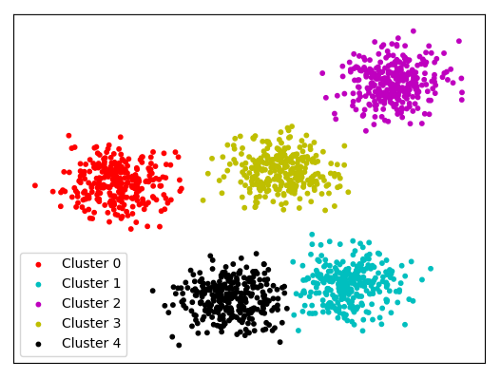




### Density-based spatial clustering of applications with noise (DBSCAN)

Given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). In the image, points A are the core samples. A data point is considered a core sample if, within its epsilon neighborhood, there are at least min_samples other data points (including itself). This means that the data point is part of a dense region.

Points B are border samples. Points N are noise points (outliers).

For each core sample, DBSCAN expands the cluster by adding all reachable data points within the epsilon neighborhood (eps). A data point is considered reachable if there is a chain of core samples that can be connected through a series of neighboring core or border samples

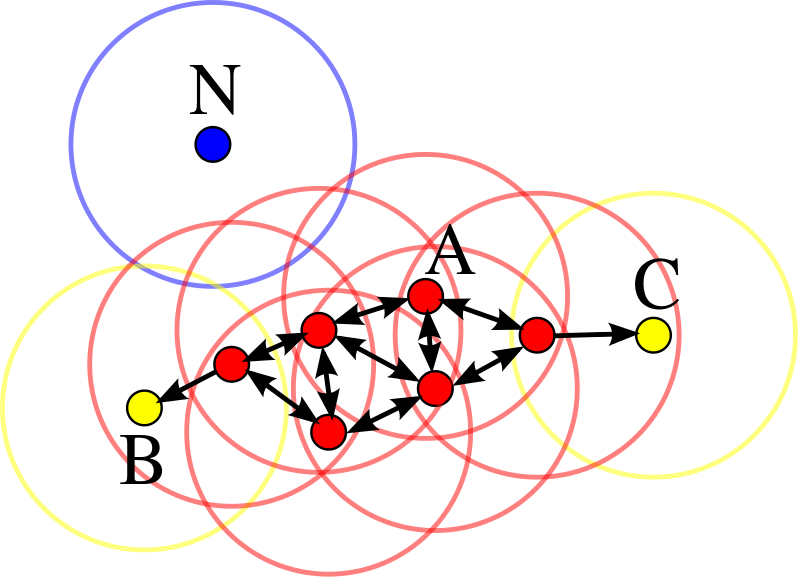


**Links**:

1. https://scikit-learn.org/stable/modules/clustering.html#dbscan
2. https://en.wikipedia.org/wiki/DBSCAN


**References**

1.   “A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise” Ester, M., H. P. Kriegel, J. Sander, and X. Xu, In Proceedings of the 2nd International Conference on Knowledge Discovery and Data Mining, Portland, OR, AAAI Press, pp. 226–231. 1996

2.   “DBSCAN revisited, revisited: why and how you should (still) use DBSCAN.
Schubert, E., Sander, J., Ester, M., Kriegel, H. P., & Xu, X. (2017). In ACM Transactions on Database Systems (TODS), 42(3), 19.



### How to use DBSCAN?

Two main hyper-parameters to tune:

1.   $ϵ$ or `eps` : The maximum distance/radious between two samples for one to be considered as in the neighborhood of the other.
2.   `min_samples` : The number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself.

More here: [sklearn API](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)

In [ ]:
# Fit the data using DBSAM
clustering = DBSCAN(eps=5, min_samples=20, n_jobs=-1).fit(scaled_data)

In [ ]:
# Each row / sample is clustered and we can get its cluster label or index from the clustering.labels_ variable
# Get the assigned clusters of the first 10 samples
clustering.labels_[:100]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
# How many different clusters did DBSCAN proposes?
np.unique(clustering.labels_)

# Each of the clusters is given a DBSCAN Label: -1, 0, 1, etc.

array([-1,  0])

## Lets print the features/columns used by DBSCAN

In [ ]:
for id, name in enumerate(num_df.columns):
  print(f'ID: {id}, Name: {name}')

ID: 0, Name: ts
ID: 1, Name: id.orig_p
ID: 2, Name: id.resp_p
ID: 3, Name: duration
ID: 4, Name: orig_bytes
ID: 5, Name: resp_bytes
ID: 6, Name: orig_pkts
ID: 7, Name: orig_ip_bytes
ID: 8, Name: resp_pkts
ID: 9, Name: resp_ip_bytes
ID: 10, Name: conn_state
ID: 11, Name: proto
ID: 12, Name: id.orig_h


### Let's plot the clusters found by DBSCAN

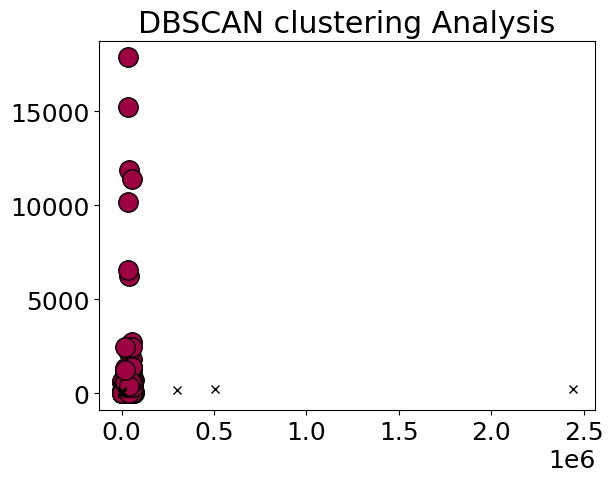

In [ ]:
# Get labels
labels = clustering.labels_

# core_samples_mask is a boolean array with the same shape as labels. It's True for core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

# unique_labels stores the unique labels assigned by DBSCAN, and colors is a list of colors for plotting each cluster. The colors are generated using the plt.cm.Spectral colormap.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

# This loop iterates over pairs of unique_labels and their corresponding colors
for k, col in zip(unique_labels, colors):

    # Checks if the current label (k) is -1, which typically represents noise points in DBSCAN. If the label is -1, the color is set to black ([0, 0, 0, 1]).
    if k == -1:
        col = [0, 0, 0, 1]

    # Creates a boolean mask (class_member_mask) where True indicates data points with the current label (k)
    class_member_mask = (labels == k)

    # Selects core samples
    xy = X[class_member_mask & core_samples_mask]
    # Plots the core samples (xy) on the graph using a large circular marker ('o') with the specified face color (markerfacecolor) and edge color (markeredgecolor).
    # The first dimension xy[:, 1] is the second column in our num_df, that is the source
    # The second dimension xy[:, 3] is the fourth column, that is id.resp_p (dst port)
    plt.plot(xy[:, 1], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    # Selects non-core samples
    xy = X[class_member_mask & ~core_samples_mask]
    # Plots the non-core samples (xy) on the graph using a smaller circular marker ('o') with the specified face color (markerfacecolor) and edge color (markeredgecolor).
    # The first dimension xy[:, 1] is the second column in our conn_df, that is the id.orig_h
    # The second dimension xy[:, 3] is the fourth column, that is id.resp_p (dst port)
    # using  12,1
    #plt.plot(xy[:, 1], xy[:, 3], 'x', markerfacecolor=tuple(col),
           # markeredgecolor='k', markersize=6)
    plt.plot(xy[:, 4], xy[:, 5], 'x', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN clustering Analysis')
plt.show()

In this graph, the X axis is the 'id.orig_h', and the Y axis is the 'id.orig_p'. But you can change that using the ID in the table above in both `plt.plot` lines.

You can see that it is hard to 'visualize' the clusters because clustering is not the same as visualizing. We have the clusters, but how can we see them better?

## Dimensionality reduction

Sometimes we have too many features and some methods do not work well or do not scale. Another reason is plotting the data in 2D.

Some known methods: *Principle Component Analysis (PCA)*, *t-SNE*, *UMAP*, etc.

### UMAP

Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation (mainly). Compared to other methods is quite fast.

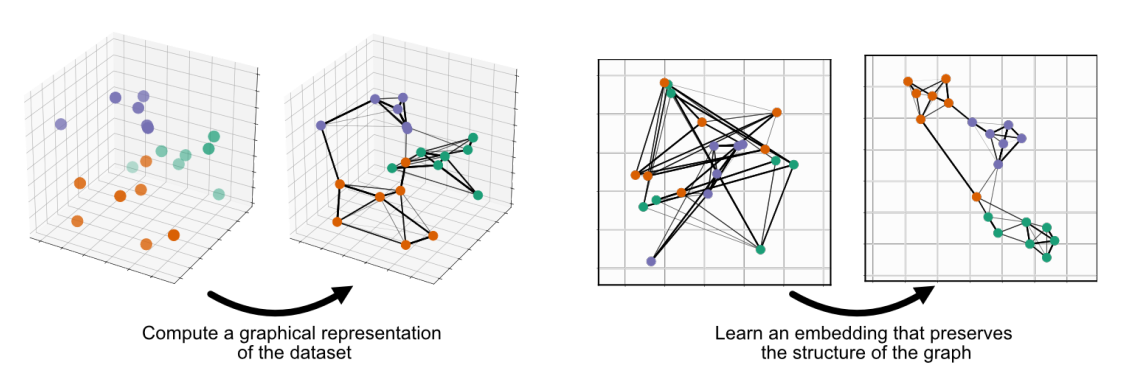

From the original space it finds the relationships. Then it creates a new space where the topology of the original points is respected (original image from UMAP
documentation).

[UMAP documentation](https://umap-learn.readthedocs.io/en/latest/)

**Parameters**
- `n_neighbors`: This parameter controls how UMAP balances local versus global structure in the data. It does this by constraining the size of the local neighborhood UMAP. Increasing the parameter leads to better retaining global structure.

- `min_dist`: controls how tightly UMAP is allowed to pack points together. It, quite literally, provides the minimum distance apart that points are allowed to be in the low dimensional representation.

UMAP can take some time to finish. Be patient. Can be 1 minute.

In [ ]:
# Create the UMAP object
reducer = umap.UMAP(n_neighbors=30, min_dist=0.1)

# Use UMAP on the data
embedding = reducer.fit_transform(scaled_data)
print(embedding.shape)

(340, 2)


## Visual analysis and plotting of the results

In [ ]:
# Lets find the original detailed labels in the first dataframe
conn_df.conn_state.unique()

['SH', 'SF', 'SHR', 'S0', 'RSTRH', 'OTH', 'RSTR', 'S1', 'S3']
Categories (10, object): ['OTH', 'RSTR', 'RSTRH', 'S0', ..., 'SF', 'SH', 'SHR', '-']

### Let's use UMAP to plot with colors the REAL labels.

Notice that we do __not__ use DBSCAN clusters yet!

UMAP (Uniform Manifold Approximation and Projection) is a Python library for dimensionality reduction and visualization. It helps simplify complex data while preserving important patterns, making it easier to understand and analyze.

In a way UMAP is kind of _clustering_ but in a more simple way (k-means style) and for reducing the dimensions and visualizing, not for finding properties or anomalies.

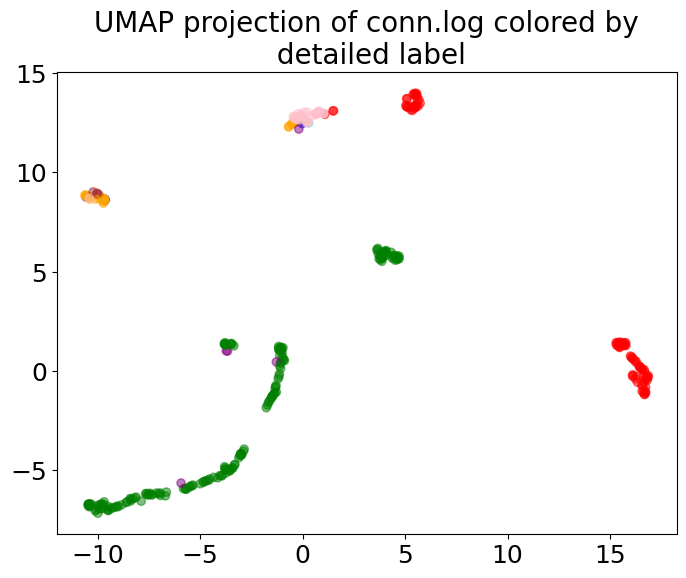

In [ ]:
# Set up the colormap based on the human detailed labels
# Older code
# color_labels = {'-': 'black', 'C&C': 'red', 'PartOfAHorizontalPortScan': 'blue'}
# Define color mapping for connection states

color_labels = {
    'SH': 'black',          # Example color for SH
    'SF': 'red',            # Example color for SF
    'SHR': 'blue',          # Example color for SHR
    'S0': 'green',          # Example color for S0
    'RSTRH': 'orange',      # Example color for RSTRH
    'OTH': 'purple',        # Example color for OTH
    'RSTR': 'brown',        # Example color for RSTR
    'S1': 'pink',           # Example color for S1
    'S3': 'cyan'            # Example color for S3
}

# Create a figure and set the size
plt.figure(figsize=(8, 6))

# Scatter plot of the 2D embeddings as (x,y) values
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = [color_labels[x] for x in conn_df.conn_state],
    alpha=0.5
    ),
# plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of conn.log colored by\n detailed label', fontsize=20);

### Now lets print the UMAP with colors for the DBSCAN Clusters

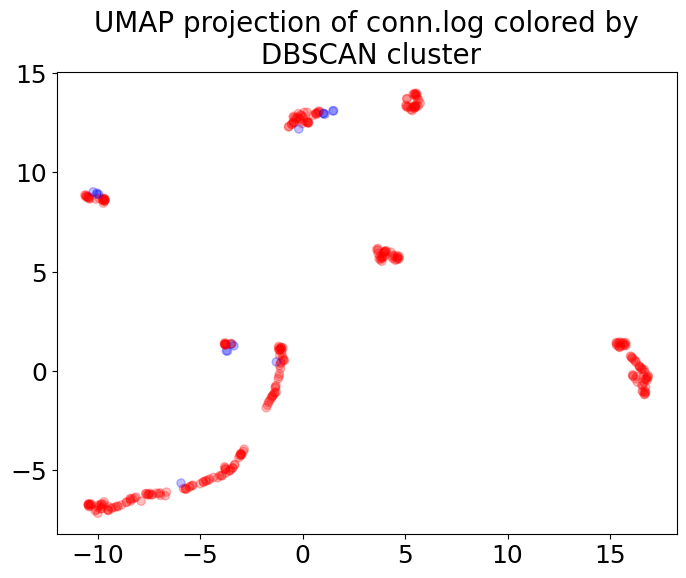

In [ ]:
# Assign a color to each DBSCAN cluster label
color_labels2 = {-1: 'blue', 0: 'red', 1:'green', 2:'yellow', 3:'magenta'}

# Create a figure
plt.figure(figsize=(8, 6))

# Scatter plot of the 2D embeddings as (x,y) values
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = [color_labels2[x] for x in list(clustering.labels_)],
    alpha=0.25
    )

# plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of conn.log colored by\n DBSCAN cluster', fontsize=20);

## Analysis of the DBSCAN clusters

Answer questions
- Do the clusters correspond to the human labels?
- How well did the model do?

First, let's look at each cluster and the distribution of detailed labels:

#### Original Labels and number of flows in them

In [ ]:
# Find the label counts given by the analyst
conn_df.groupby("conn_state")["conn_state"].count()

/var/folders/ct/ghxtkyqs2txd2qcls51zgbgm0000gn/T/ipykernel_41611/1781988514.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conn_df.groupby("conn_state")["conn_state"].count()


conn_state
OTH        5
RSTR       4
RSTRH     26
S0       180
S1        30
S3         1
SF        89
SH         1
SHR        4
-          0
Name: conn_state, dtype: int64

### Flows in Cluster -1

In [ ]:
# Check out some flows in this cluster
conn_df[clustering.labels_ == -1].groupby("conn_state").head()

/var/folders/ct/ghxtkyqs2txd2qcls51zgbgm0000gn/T/ipykernel_41611/1231640781.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conn_df[clustering.labels_ == -1].groupby("conn_state").head()


,ts,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
50,1.589739e+09,3232238214,45561,104.112.21.176,443,tcp,ssl,0 days 00:00:07.170077,4315,2439411,SF,T,F,0,ShADadFRf,204,14907,1773,2531615
167,1.589739e+09,3232238214,3,192.168.0.1,3,icmp,NaN,NaT,<NA>,<NA>,OTH,T,T,0,NaN,1,189,0,0
172,1.589739e+09,3232238214,46593,172.217.12.234,443,tcp,NaN,0 days 00:00:00.004937,31,0,RSTR,T,F,0,DFr,2,135,1,40
247,1.589739e+09,3232238214,37049,69.10.180.70,443,tcp,ssl,0 days 00:00:00.668343,189250,3879,SF,T,F,0,ShADadfF,143,196694,70,7527
250,1.589739e+09,3232238214,50058,69.10.180.70,443,tcp,ssl,0 days 00:00:00.372940,186611,351,SF,T,F,0,ShADadfF,138,193795,69,3947
261,1.589739e+09,3232238214,55840,172.217.2.106,443,tcp,NaN,0 days 00:00:00.016718,24,0,RSTR,T,F,0,DFr,2,128,1,40
262,1.589739e+09,3232238214,58256,172.217.164.142,443,tcp,NaN,0 days 00:00:00.004729,24,0,RSTR,T,F,0,DFr,2,128,1,40
270,1.589739e+09,3232238214,39650,172.217.2.106,443,tcp,NaN,0 days 00:00:00.024243,24,0,RSTR,T,F,0,DFr,2,128,1,40
284,1.589739e+09,3232238466,8009,192.168.10.134,56138,tcp,NaN,0 days 00:00:00.000077,1,0,OTH,T,T,0,Aa,1,52,1,52
285,1.589739e+09,3232238466,8009,192.168.10.134,56137,tcp,NaN,0 days 00:00:00.000208,1,0,OTH,T,T,0,Aa,1,52,1,52


### Flows in Cluster 0

In [ ]:
conn_df[clustering.labels_ == 0].groupby("conn_state")["conn_state"].count()


/var/folders/ct/ghxtkyqs2txd2qcls51zgbgm0000gn/T/ipykernel_41611/3770770718.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conn_df[clustering.labels_ == 0].groupby("conn_state")["conn_state"].count()


conn_state
OTH        0
RSTR       0
RSTRH     26
S0       178
S1        28
S3         1
SF        86
SH         1
SHR        4
-          0
Name: conn_state, dtype: int64

In [ ]:
# Check out some flows in this cluster
conn_df[clustering.labels_ == -1].groupby("conn_state").head()

/var/folders/ct/ghxtkyqs2txd2qcls51zgbgm0000gn/T/ipykernel_41611/1231640781.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conn_df[clustering.labels_ == -1].groupby("conn_state").head()


,ts,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
50,1.589739e+09,3232238214,45561,104.112.21.176,443,tcp,ssl,0 days 00:00:07.170077,4315,2439411,SF,T,F,0,ShADadFRf,204,14907,1773,2531615
167,1.589739e+09,3232238214,3,192.168.0.1,3,icmp,NaN,NaT,<NA>,<NA>,OTH,T,T,0,NaN,1,189,0,0
172,1.589739e+09,3232238214,46593,172.217.12.234,443,tcp,NaN,0 days 00:00:00.004937,31,0,RSTR,T,F,0,DFr,2,135,1,40
247,1.589739e+09,3232238214,37049,69.10.180.70,443,tcp,ssl,0 days 00:00:00.668343,189250,3879,SF,T,F,0,ShADadfF,143,196694,70,7527
250,1.589739e+09,3232238214,50058,69.10.180.70,443,tcp,ssl,0 days 00:00:00.372940,186611,351,SF,T,F,0,ShADadfF,138,193795,69,3947
261,1.589739e+09,3232238214,55840,172.217.2.106,443,tcp,NaN,0 days 00:00:00.016718,24,0,RSTR,T,F,0,DFr,2,128,1,40
262,1.589739e+09,3232238214,58256,172.217.164.142,443,tcp,NaN,0 days 00:00:00.004729,24,0,RSTR,T,F,0,DFr,2,128,1,40
270,1.589739e+09,3232238214,39650,172.217.2.106,443,tcp,NaN,0 days 00:00:00.024243,24,0,RSTR,T,F,0,DFr,2,128,1,40
284,1.589739e+09,3232238466,8009,192.168.10.134,56138,tcp,NaN,0 days 00:00:00.000077,1,0,OTH,T,T,0,Aa,1,52,1,52
285,1.589739e+09,3232238466,8009,192.168.10.134,56137,tcp,NaN,0 days 00:00:00.000208,1,0,OTH,T,T,0,Aa,1,52,1,52


In [ ]:
conn_df[clustering.labels_ == 0].groupby("conn_state")["conn_state"].count()


/var/folders/ct/ghxtkyqs2txd2qcls51zgbgm0000gn/T/ipykernel_41611/3770770718.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conn_df[clustering.labels_ == 0].groupby("conn_state")["conn_state"].count()


conn_state
OTH        0
RSTR       0
RSTRH     26
S0       178
S1        28
S3         1
SF        86
SH         1
SHR        4
-          0
Name: conn_state, dtype: int64

### Flows in Cluster 1

In [ ]:
# Check out some flows in this cluster
conn_df[clustering.labels_ == -1].groupby("conn_state").head()

/var/folders/ct/ghxtkyqs2txd2qcls51zgbgm0000gn/T/ipykernel_41611/1231640781.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conn_df[clustering.labels_ == -1].groupby("conn_state").head()


,ts,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
50,1.589739e+09,3232238214,45561,104.112.21.176,443,tcp,ssl,0 days 00:00:07.170077,4315,2439411,SF,T,F,0,ShADadFRf,204,14907,1773,2531615
167,1.589739e+09,3232238214,3,192.168.0.1,3,icmp,NaN,NaT,<NA>,<NA>,OTH,T,T,0,NaN,1,189,0,0
172,1.589739e+09,3232238214,46593,172.217.12.234,443,tcp,NaN,0 days 00:00:00.004937,31,0,RSTR,T,F,0,DFr,2,135,1,40
247,1.589739e+09,3232238214,37049,69.10.180.70,443,tcp,ssl,0 days 00:00:00.668343,189250,3879,SF,T,F,0,ShADadfF,143,196694,70,7527
250,1.589739e+09,3232238214,50058,69.10.180.70,443,tcp,ssl,0 days 00:00:00.372940,186611,351,SF,T,F,0,ShADadfF,138,193795,69,3947
261,1.589739e+09,3232238214,55840,172.217.2.106,443,tcp,NaN,0 days 00:00:00.016718,24,0,RSTR,T,F,0,DFr,2,128,1,40
262,1.589739e+09,3232238214,58256,172.217.164.142,443,tcp,NaN,0 days 00:00:00.004729,24,0,RSTR,T,F,0,DFr,2,128,1,40
270,1.589739e+09,3232238214,39650,172.217.2.106,443,tcp,NaN,0 days 00:00:00.024243,24,0,RSTR,T,F,0,DFr,2,128,1,40
284,1.589739e+09,3232238466,8009,192.168.10.134,56138,tcp,NaN,0 days 00:00:00.000077,1,0,OTH,T,T,0,Aa,1,52,1,52
285,1.589739e+09,3232238466,8009,192.168.10.134,56137,tcp,NaN,0 days 00:00:00.000208,1,0,OTH,T,T,0,Aa,1,52,1,52


## What else can we do?

1.   Check the noisy and incorrect clusterings.
2.   Improve the features.
3.   Add new features from the other logs.
4.   Add more data.
5.   Try other algorithms.


In [ ]:
# View all the data points that were part of the "noisy" cluster in DBSCAN
conn_df[clustering.labels_ == -1]

,ts,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
50,1.589739e+09,3232238214,45561,104.112.21.176,443,tcp,ssl,0 days 00:00:07.170077,4315,2439411,SF,T,F,0,ShADadFRf,204,14907,1773,2531615
167,1.589739e+09,3232238214,3,192.168.0.1,3,icmp,NaN,NaT,<NA>,<NA>,OTH,T,T,0,NaN,1,189,0,0
172,1.589739e+09,3232238214,46593,172.217.12.234,443,tcp,NaN,0 days 00:00:00.004937,31,0,RSTR,T,F,0,DFr,2,135,1,40
247,1.589739e+09,3232238214,37049,69.10.180.70,443,tcp,ssl,0 days 00:00:00.668343,189250,3879,SF,T,F,0,ShADadfF,143,196694,70,7527
250,1.589739e+09,3232238214,50058,69.10.180.70,443,tcp,ssl,0 days 00:00:00.372940,186611,351,SF,T,F,0,ShADadfF,138,193795,69,3947
261,1.589739e+09,3232238214,55840,172.217.2.106,443,tcp,NaN,0 days 00:00:00.016718,24,0,RSTR,T,F,0,DFr,2,128,1,40
262,1.589739e+09,3232238214,58256,172.217.164.142,443,tcp,NaN,0 days 00:00:00.004729,24,0,RSTR,T,F,0,DFr,2,128,1,40
270,1.589739e+09,3232238214,39650,172.217.2.106,443,tcp,NaN,0 days 00:00:00.024243,24,0,RSTR,T,F,0,DFr,2,128,1,40
284,1.589739e+09,3232238466,8009,192.168.10.134,56138,tcp,NaN,0 days 00:00:00.000077,1,0,OTH,T,T,0,Aa,1,52,1,52
285,1.589739e+09,3232238466,8009,192.168.10.134,56137,tcp,NaN,0 days 00:00:00.000208,1,0,OTH,T,T,0,Aa,1,52,1,52
